In [101]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [102]:
data=pd.read_csv("https://raw.githubusercontent.com/WidhyaOrg/datasets/master/covid19.csv", sep= ',')

In [103]:
data.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0


In [104]:
data.set_index('Sno',inplace= True)

In [105]:
newdata = data.groupby(['Date'], sort=False, as_index=False)['ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths'].aggregate(np.sum)

In [106]:
newdata["total"]=newdata.iloc[:, 1:].sum(axis=1)

In [107]:
newdata.loc[newdata['Date'] == '04/03/20']

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,total
34,04/03/20,12,16,3,0,31


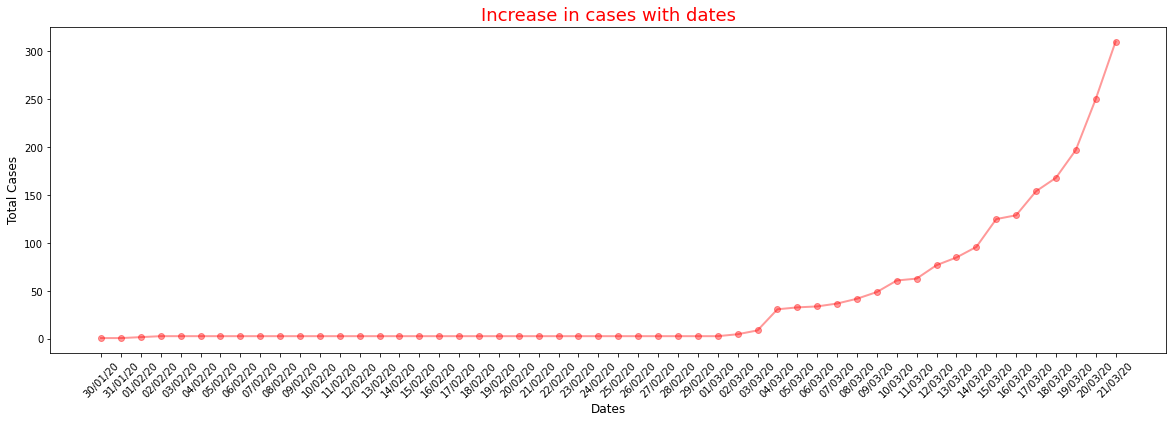

In [108]:
plt.figure(figsize= (20, 6))
plt.plot(newdata['Date'], newdata['total'], linewidth=2.0, color='r', alpha=0.4, marker='o')
plt.title('Increase in cases with dates',fontsize=18, color='r')
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Total Cases',fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [109]:
newdata['rate'] = (newdata['total'].diff().shift(-1))/newdata['total']

In [110]:
r=newdata['rate'].mean()

In [111]:
r

0.15548289717820452

### Exponential equation: P_t = P_o* e^(r*t)

In [112]:
import math as m
required_pt=31*m.exp(r*26)

In [115]:
int(required_pt)

1766